<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [30]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [31]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [32]:
import spacy

nlp = spacy.load('en_core_web_lg')

def tokenize(doc):
    return [token.lemma_ for token in nlp(doc)]

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [35]:
vects = [nlp(doc).vector for doc in yelp['text']]

In [37]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10)

nn.fit(vects)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [38]:
fake_review = "The place had amzing burgers. They were incredibly juicy and cheesy, and everything from the bun to the lettuce were freshly fresh."

fake_review_vect = nlp(fake_review).vector

In [40]:
most_similiar = nn.kneighbors([fake_review_vect])

In [45]:
# Most Similiar Reviews to Fake Review
yelp.iloc[most_similiar[1][0]]['text']

2503    I wanted to try someplace new so I gave Lefty'...
619     I got a cheeseburger and fries but skipped on ...
6325    If you are looking for some great chicken then...
3491    We had a fantastic dinner at Tuck Shop. I'd gi...
6698    We loved this little restaurant everything is ...
5919    The food was ok, I guess. It just seemed overp...
8629    I was lucky to have been invited to the Yelp e...
7982    We sat at the bar and the bartender was very n...
4339    Had sunday supper here this weekend- \n\nresta...
2164    I went to Cowboy Ciao for lunch with co-worker...
Name: text, dtype: object

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

pipe.fit(yelp['text'], yelp['stars'])

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    'tfidf__max_df':(0.5, 0.75, 1),
    'clf__n_neighbors':(5,10,15)
}

gs = GridSearchCV(pipe, params, cv=5, verbose=True, n_jobs=-1)

gs.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   53.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'tfidf__max_df': (0.5, 0.75, 1), 'clf__n_neighbors': (5, 10, 15)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [54]:
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
import gensim

In [55]:
tokens =[tokenize(doc) for doc in yelp['text']]

In [77]:
id2word = corpora.Dictionary(tokens)
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=10, no_above=0.5)

In [78]:
corpus = [id2word.doc2bow(text) for text in tokens]

In [79]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=12
                  )

In [87]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]).strip().replace('\n', '') for t in words]

In [81]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [84]:
topics

['do so there with',
 'on with food',
 'do  that order get',
 'but with get',
 'do that   with on',
 'great place very good with',
 'with good food but',
 '... *  .. de',
 'that on do but',
 'that but - with',
 'that do but on get',
 'nail do hair go buffet',
 'but good on )',
 'pizza that but place good',
 'food   + 0.014*  + 0.013*']

In [94]:
df = pd.DataFrame.from_records(new_distro, index=yelp.index)
df.columns = topics

df['stars'] = yelp['stars']

In [95]:
df.head()

,do so there with,on with food,do that order get,but with get,do that with on,great place very good with,with good food but,... * .. de,that on do but,that but - with,that do but on get,nail do hair go buffet,but good on ),pizza that but place good,food + 0.014* + 0.013*,stars
0,0.000000,0.0,0.345179,0.000000,0.595523,0.000000,0.000000,0.000000,0.047703,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1
1,0.000000,0.0,0.000000,0.000000,0.000000,0.948148,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,4
2,0.611958,0.0,0.000000,0.000000,0.381218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.093668,0.000000,0.000000,0.380237,0.0,0.000000,0.505583,0.0,1
4,0.000000,0.0,0.000000,0.080189,0.000000,0.000000,0.252065,0.000000,0.000000,0.104917,0.000000,0.0,0.552201,0.000000,0.0,4


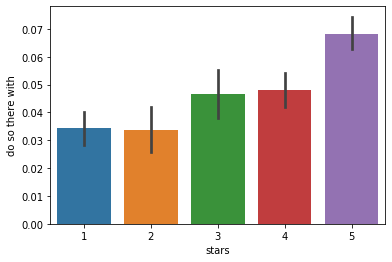

In [100]:
import seaborn as sns

sns.barplot(x="stars", y=topics[0], data=df)

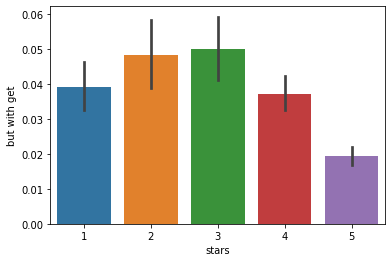

In [102]:
sns.barplot(x="stars", y=topics[3], data=df)

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)